In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [90]:
data = pd.read_csv('adult/data.txt', index_col=0)

In [51]:
data.shape

(3000, 14)

In [52]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,61,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,Germany,>50K
1,37,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,15024,0,40,United-States,>50K
2,50,Private,1st-4th,2,Married-spouse-absent,Craft-repair,Unmarried,White,Male,0,0,40,United-States,<=50K
3,38,Private,HS-grad,9,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,50,United-States,>50K
4,56,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,Black,Female,0,0,38,United-States,<=50K


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 15 columns):
age                3000 non-null int64
 workclass         3000 non-null object
 fnlwgt            3000 non-null int64
 education         3000 non-null object
 education-num     3000 non-null int64
 marital-status    3000 non-null object
 occupation        3000 non-null object
 relationship      3000 non-null object
 race              3000 non-null object
 sex               3000 non-null object
 capital-gain      3000 non-null int64
 capital-loss      3000 non-null int64
 hours-per-week    3000 non-null int64
 native-country    3000 non-null object
 class             3000 non-null object
dtypes: int64(6), object(9)
memory usage: 351.6+ KB


In [17]:
for i in data.columns:
    print data[i].unique(), '\t', data[i].nunique()

[61 37 50 38 56 35 28 39 47 45 26 33 36 41 17 76 40 32 43 49 54 62 60 46
 29 75 42 22 52 44 25 58 19 20 53 63 34 30 23 59 55 31 27 57 48 18 72 69
 78 66 51 68 65 24 21 67 81 77 64 71 79 70 73 88 90 80 74] 	67
[' Self-emp-inc' ' Private' ' State-gov' ' Local-gov' ' Self-emp-not-inc'
 ' Federal-gov' ' ?' ' Without-pay'] 	8
[134768 148015 193374 ... 224910 164799 246439] 	2803
[' Bachelors' ' 1st-4th' ' HS-grad' ' Some-college' ' Assoc-acdm' ' 10th'
 ' Masters' ' 9th' ' 12th' ' Assoc-voc' ' 11th' ' 7th-8th' ' 5th-6th'
 ' Prof-school' ' Doctorate' ' Preschool'] 	16
[13  2  9 10 12  6 14  5  8 11  7  4  3 15 16  1] 	16
[' Married-civ-spouse' ' Married-spouse-absent' ' Widowed'
 ' Never-married' ' Divorced' ' Separated' ' Married-AF-spouse'] 	7
[' Exec-managerial' ' Prof-specialty' ' Craft-repair' ' Tech-support'
 ' Adm-clerical' ' Transport-moving' ' Machine-op-inspct' ' Sales'
 ' Other-service' ' Farming-fishing' ' Handlers-cleaners' ' ?'
 ' Protective-serv' ' Priv-house-serv' ' Armed-Forc

In [18]:
for i in data.columns:
    print data[i].value_counts()
    print

44    92
41    92
31    91
38    90
34    90
43    89
42    87
47    87
37    87
39    84
46    83
45    82
33    82
35    81
30    80
36    79
51    78
32    78
40    72
49    70
50    70
29    61
53    60
48    59
28    58
26    57
52    57
27    56
25    55
24    53
      ..
59    36
17    32
21    32
58    32
60    30
61    30
56    30
63    24
18    23
62    23
64    21
65    18
67    14
66    12
68    10
71     7
72     7
76     7
69     6
90     5
70     5
75     5
73     4
78     2
79     2
77     2
74     1
80     1
88     1
81     1
Name: age, Length: 67, dtype: int64

 Private             2022
 Self-emp-not-inc     250
 Local-gov            207
 Self-emp-inc         158
 ?                    148
 State-gov            120
 Federal-gov           94
 Without-pay            1
Name:  workclass, dtype: int64

111567    4
117963    4
116632    4
126569    3
94235     3
99185     3
120539    3
175339    3
185041    3
125417    3
329980    3
194636    3
163003    3
182556    3
195124

In [39]:
data = data.drop('fnlwgt', axis=1)

In [53]:
from sklearn.preprocessing import LabelEncoder

In [83]:
le=LabelEncoder()

In [91]:
cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex','native-country', 'class']
mappings = {}
for i in cols:
    data[i]=le.fit_transform(data[i])
    mappings[i] = list(le.classes_)

In [92]:
mappings

{'class': [' <=50K', ' >50K'],
 'education': [' 10th',
  ' 11th',
  ' 12th',
  ' 1st-4th',
  ' 5th-6th',
  ' 7th-8th',
  ' 9th',
  ' Assoc-acdm',
  ' Assoc-voc',
  ' Bachelors',
  ' Doctorate',
  ' HS-grad',
  ' Masters',
  ' Preschool',
  ' Prof-school',
  ' Some-college'],
 'marital-status': [' Divorced',
  ' Married-AF-spouse',
  ' Married-civ-spouse',
  ' Married-spouse-absent',
  ' Never-married',
  ' Separated',
  ' Widowed'],
 'native-country': [' ?',
  ' Cambodia',
  ' Canada',
  ' China',
  ' Columbia',
  ' Cuba',
  ' Dominican-Republic',
  ' Ecuador',
  ' El-Salvador',
  ' England',
  ' France',
  ' Germany',
  ' Greece',
  ' Guatemala',
  ' Haiti',
  ' Honduras',
  ' India',
  ' Iran',
  ' Ireland',
  ' Italy',
  ' Jamaica',
  ' Japan',
  ' Laos',
  ' Mexico',
  ' Nicaragua',
  ' Outlying-US(Guam-USVI-etc)',
  ' Peru',
  ' Philippines',
  ' Poland',
  ' Portugal',
  ' Puerto-Rico',
  ' Scotland',
  ' South',
  ' Taiwan',
  ' Thailand',
  ' Trinadad&Tobago',
  ' United-States

In [93]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,61,4,9,13,2,4,0,4,1,0,0,50,11,1
1,37,3,9,13,2,10,5,2,0,15024,0,40,36,1
2,50,3,3,2,3,3,4,4,1,0,0,40,36,0
3,38,3,11,9,2,13,0,4,1,0,0,50,36,1
4,56,3,11,9,6,1,4,2,0,0,0,38,36,0


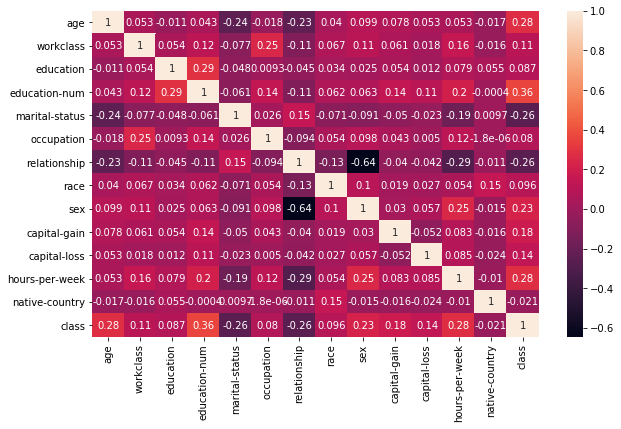

In [95]:
fig=plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)

In [96]:
data.columns

Index([u'age', u'workclass', u'education', u'education-num', u'marital-status',
       u'occupation', u'relationship', u'race', u'sex', u'capital-gain',
       u'capital-loss', u'hours-per-week', u'native-country', u'class'],
      dtype='object')

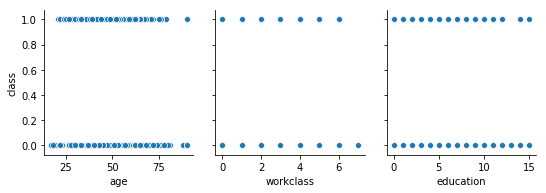

In [97]:
sns.pairplot(data, x_vars=[u'age', u'workclass', u'education'], y_vars='class')

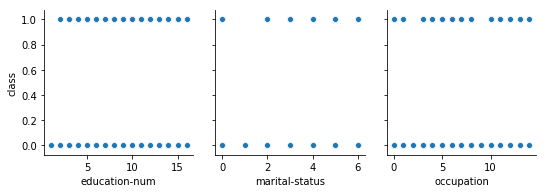

In [98]:
sns.pairplot(data, x_vars=[u'education-num', u'marital-status',
       u'occupation'], y_vars='class')

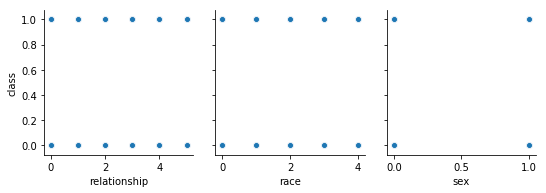

In [99]:
sns.pairplot(data, x_vars=[u'relationship', u'race', u'sex'], y_vars='class')

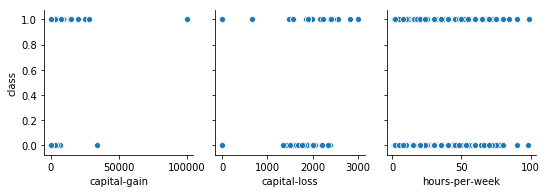

In [100]:
sns.pairplot(data, x_vars=[u'capital-gain',
       u'capital-loss', u'hours-per-week'], y_vars='class')

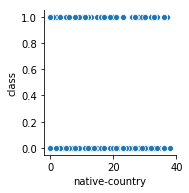

In [101]:
sns.pairplot(data, x_vars=[u'native-country'], y_vars='class')